In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv("Downloads/supermarket_sales.csv")
sales.shape

(1000, 17)

In [8]:
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,01-10-2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


# EDA

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [15]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### There are no null values in the dataset
#### There are 9 data points with data-type object, which will be converted later using get-dummies
#### There are no ouliers in the data
#### Branch and City represents same data, which is redundant, so will drop either one of those 2 columns
#### Invoice ID is not required for any analysis, so it will be dropped as well

In [13]:
sales.columns.unique()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [20]:
sales.drop(["Invoice ID","Branch"], axis = 1, inplace = True)

In [21]:
sales.columns.unique()

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

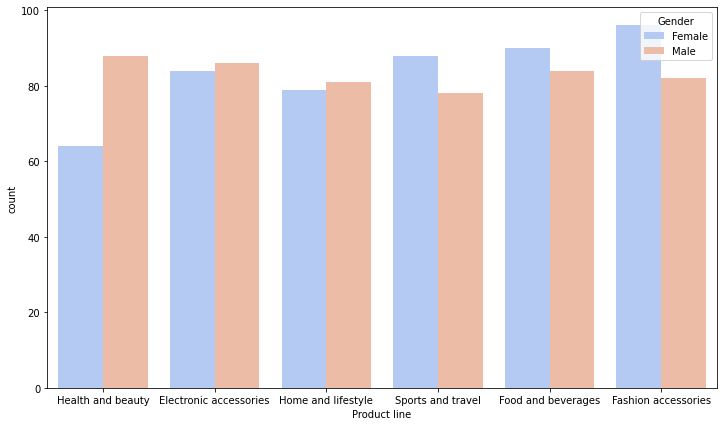

In [31]:
plt.figure(figsize = (12,7))
sns.countplot(x = sales["Product line"], data = sales, palette = "coolwarm", hue = sales["Gender"])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

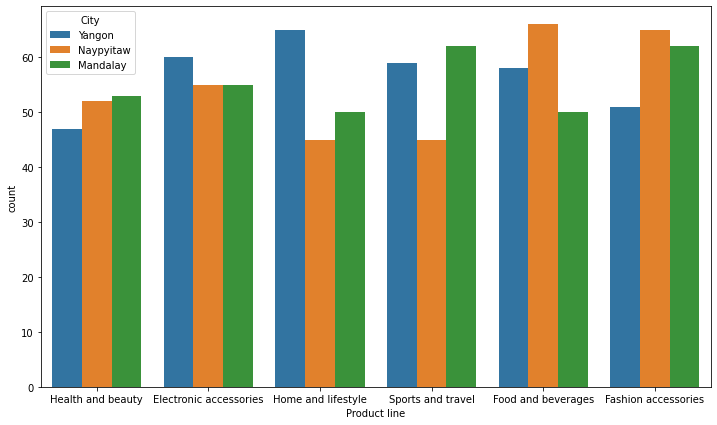

In [33]:
plt.figure(figsize = (12,7))
sns.countplot(x = sales["Product line"], data = sales, hue = sales["City"])
plt.show

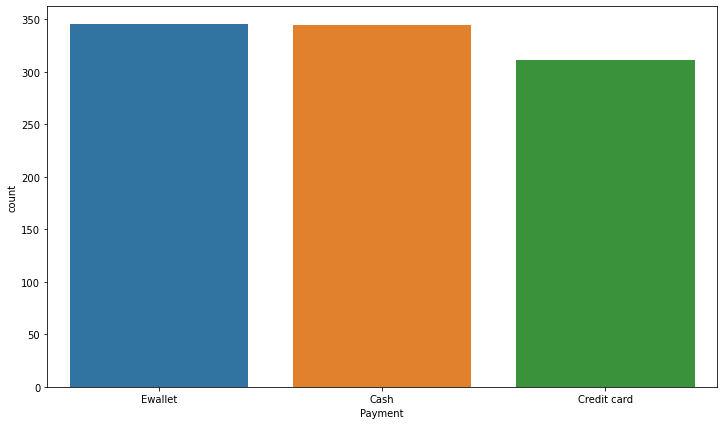

In [36]:
plt.figure(figsize = (12,7))
sns.countplot(x = sales["Payment"], data = sales)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

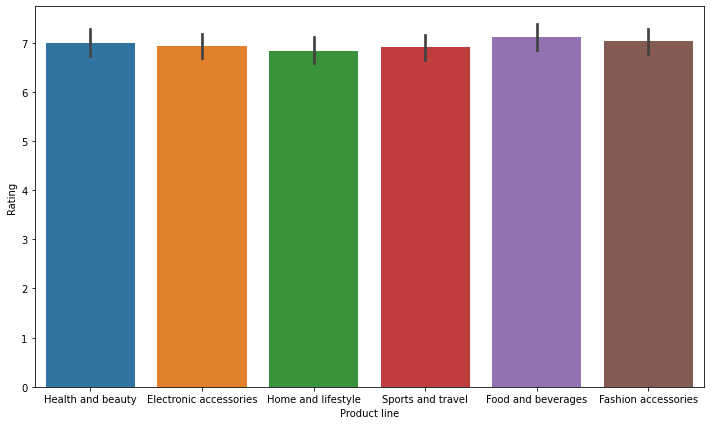

In [37]:
plt.figure(figsize = (12,7))
sns.barplot(x = sales["Product line"], data = sales, y = sales["Rating"])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

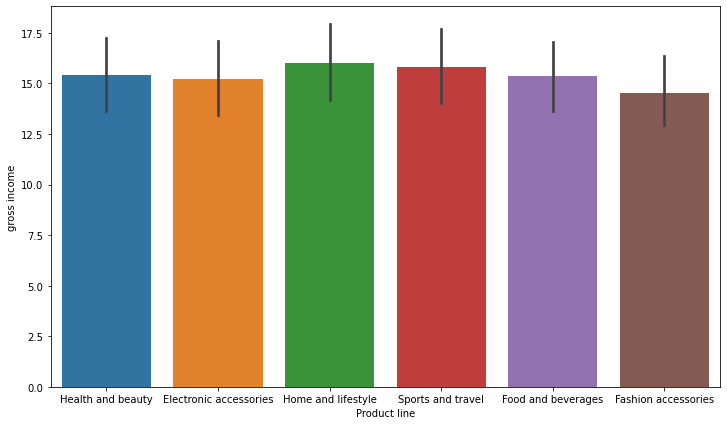

In [40]:
plt.figure(figsize = (12,7))
sns.barplot(x = sales["Product line"], data = sales, y = sales["gross income"])
plt.show

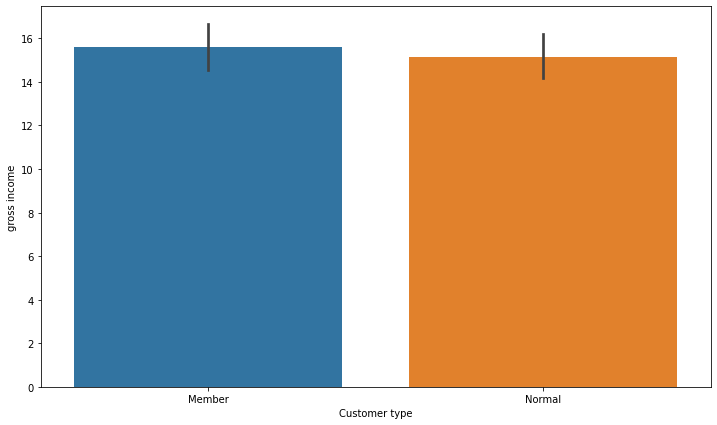

In [42]:
plt.figure(figsize = (12,7))
sns.barplot(x = sales["Customer type"], data = sales, y = sales["gross income"])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

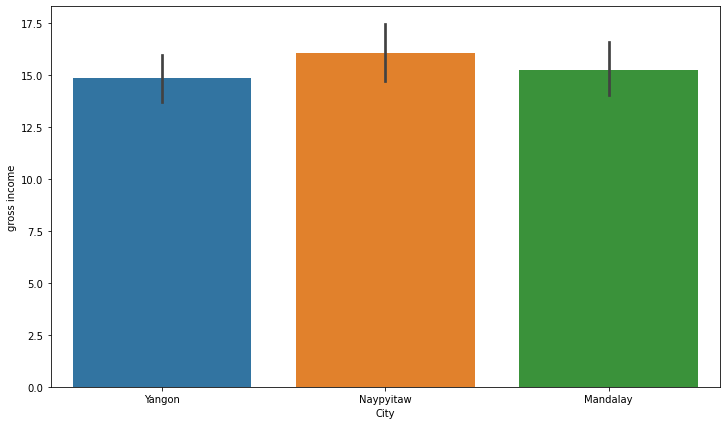

In [52]:
plt.figure(figsize = (12,7))
sns.barplot(x = sales["City"],y=sales["gross income"], data = sales)
plt.show

In [53]:
sales.drop(["Date","Time"], axis = 1, inplace = True)

### Here are few of the observations after seeing the data and plotting some graphs
    1 Leasr rating is 4 and highest rating is 10
    2 There are 1000 customers in total
    3 Surprisingly there are more sales in "health and beauty" from male and "sports and travel" from female
    4 More cutomers pay through Ewallet
    5 "Food and bewarages" products are rated high and "Home and Lifestyle" rate low
    6 Overall avearge rating is 7
    7 Interms of income "Home and Lifestyle" are on top while "Fashion accessories" are at bottom
    8 There are more number od "Member" type customers and they contribute more towards gross income when compared to others
    9 in comparision, the store in Naypyitaw city generate more income

### Modelling - Using Linear Regression

In [54]:
sales = pd.get_dummies(sales, columns = ["City", "Customer type", "Gender","Product line","Payment"],drop_first = True)

In [55]:
sales.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0,1,0,0,0,0,1,0,0,0,1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,1,0,1,0,0,0,0,0,0,0,0
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0,1,1,1,0,0,0,1,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0,1,0,1,0,0,1,0,0,0,1
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,0,1,1,1,0,0,0,0,1,0,1


#### Object data type is converted into required format

#### x and y splitting

In [58]:
x = sales.drop(["Total"], axis = 1)
y = sales["Total"]
print(x.head())
print(y.head())

   Unit price  Quantity   Tax 5%    cogs  gross margin percentage  \
0       74.69         7  26.1415  522.83                 4.761905   
1       15.28         5   3.8200   76.40                 4.761905   
2       46.33         7  16.2155  324.31                 4.761905   
3       58.22         8  23.2880  465.76                 4.761905   
4       86.31         7  30.2085  604.17                 4.761905   

   gross income  Rating  City_Naypyitaw  City_Yangon  Customer type_Normal  \
0       26.1415     9.1               0            1                     0   
1        3.8200     9.6               1            0                     1   
2       16.2155     7.4               0            1                     1   
3       23.2880     8.4               0            1                     0   
4       30.2085     5.3               0            1                     1   

   Gender_Male  Product line_Fashion accessories  \
0            0                                 0   
1           

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(750, 18) (250, 18) (750,) (250,)


In [62]:
sales_model1 = LinearRegression()
sales_model1.fit(x_train,y_train)
y_pred = sales_model1.predict(x_test)

In [64]:
mean_squared_error(y_test,y_pred)

2.650938673002622e-27

In [65]:
r2_score(y_test,y_pred)

1.0

## Ridge Regression

In [80]:
sales_model2 = Ridge(alpha = 1.0, fit_intercept = True, tol = 0.001, solver = "auto",max_iter = 100, random_state = None)
sales_model2.fit(x_train,y_train)
y_pred = sales_model2.predict(x_test)

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.835975134812158e-05

In [82]:
r2_score(y_test,y_pred)

0.999999999999995

## Lasso Regression

In [87]:
sales_model3 = Lasso(alpha = 1.0, fit_intercept = True, tol = 0.001, selection = "cyclic",max_iter = 100, random_state = None)
sales_model3.fit(x_train,y_train)
y_pred = sales_model2.predict(x_test)

In [88]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.835975134812158e-05

In [89]:
r2_score(y_test,y_pred)

0.999999999999995